In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp
import sys
sys.path.append("../../utils/")
from plot_utils import get_colors
from data_loader import load_census_data

In [ ]:
def get_value_from_dict(folder_name, key=None):
    with open(folder_name + "/results.pkl") as f:
        res_dict = cp.load(f)
    return res_dict[key]

In [ ]:
colors_dict = get_colors()

In [ ]:
general_folder_eigen = "/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_full_U/"

# 8192 fp feat

In [ ]:
general_folder = "/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design/"

In [ ]:
def get_l2_error(subkey_list, result_folder):
    l2_error_train_list = []
    l2_error_test_list = []
    lambda_list = []
    subdirs = [x[0] for x in os.walk(result_folder)] 
    for subdir in subdirs:
        is_target = True
        for subkey in subkey_list:
            if subkey not in subdir:
                is_target = False
                break
            if ("seed_1_" not in subdir) and ("seed_2_" not in subdir) and ("seed_3_" not in subdir):
                is_target = False
                break
        if is_target:
            l2_error_train_list.append(np.sqrt(get_value_from_dict(subdir, "train_l2_error") ) )
            l2_error_test_list.append(np.sqrt(get_value_from_dict(subdir, "test_l2_error") ) )
            lambda_list.append(float(subdir.split("lambda_")[1].split("_")[0]) )
    return l2_error_train_list, l2_error_test_list, lambda_list

In [ ]:
X_train, X_test, Y_train, Y_test = load_census_data("../../../data/census/")

### get theory prediction value

In [ ]:
def get_theory_l2_loss(reg_lambda_list, noise_sigma, n_fp_feat, general_folder, general_folder_eigen, y_gt):
    theory_l2_loss = []
    theory_l2_loss_std = []
    U_dict = {}
    S_dict = {}
    for reg_lambda in reg_lambda_list:
        tmp_l2_loss = []
        for seed in [1, 2, 3]:
            eigen_val_file = general_folder_eigen + "lambda_1e-6_seed_" + str(seed) + "_n_fp_feat_" \
                + str(n_fp_feat) + "_fp_rff_noise_sigma_" + noise_sigma + "/kernel_eigen_value.npy"
            eigen_vec_file = general_folder_eigen + "lambda_1e-6_seed_" + str(seed) + "_n_fp_feat_" \
                + str(n_fp_feat) + "_fp_rff_noise_sigma_" + noise_sigma + "/kernel_eigen_vector.npy"
            if eigen_vec_file not in U_dict.keys():
                with open(eigen_val_file, "r") as f:
                    eigen_val = np.load(f)
                with open(eigen_vec_file, "r") as f:
                    eigen_vec = np.load(f) 
                U_dict[eigen_vec_file] = eigen_vec.copy()
                S_dict[eigen_val_file] = eigen_val.copy()
            eigen_val = S_dict[eigen_val_file]
            eigen_vec = U_dict[eigen_vec_file]
#             print eigen_vec.shape, eigen_val.shape
            gamma = eigen_val / (eigen_val + float(reg_lambda) )
            l2_loss = np.sum( (gamma - 1)**2 * (np.dot(eigen_vec.T, y_gt.reshape(y_gt.size, 1) ) ).reshape(gamma.size)**2) \
                + np.sum(float(noise_sigma)**2 * gamma**2) + y_gt.size * float(noise_sigma)**2
            tmp_l2_loss.append(l2_loss/float(y_gt.size) )
        theory_l2_loss.append(np.mean(np.sqrt(tmp_l2_loss) ) )
        theory_l2_loss_std.append(np.std(np.sqrt(tmp_l2_loss) ) )
    return theory_l2_loss, theory_l2_loss_std

# 8192 rff

('noise level', '1e-2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


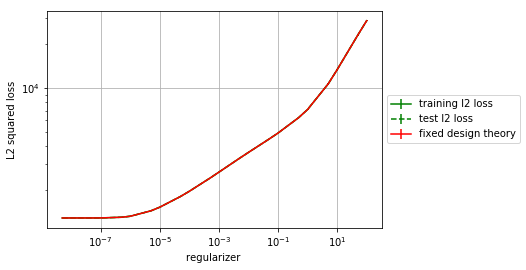

('noise level', '1e-1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


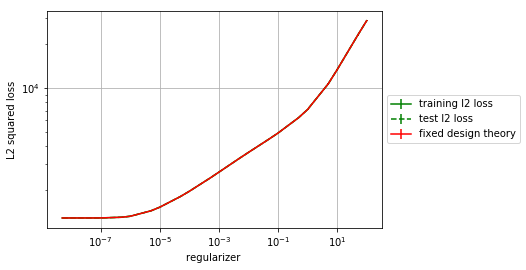

('noise level', '1e0')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


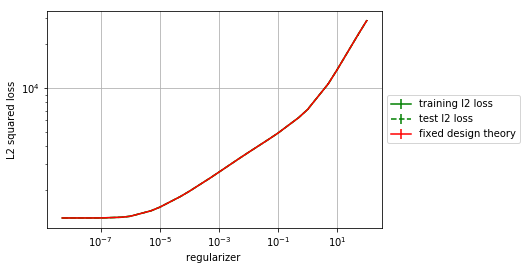

('noise level', '1e1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


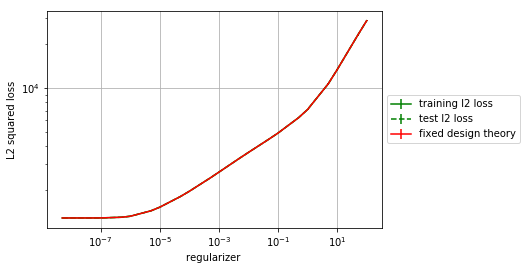

('noise level', '1e2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


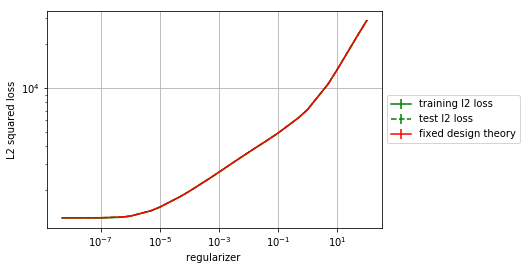

('noise level', '1e3')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


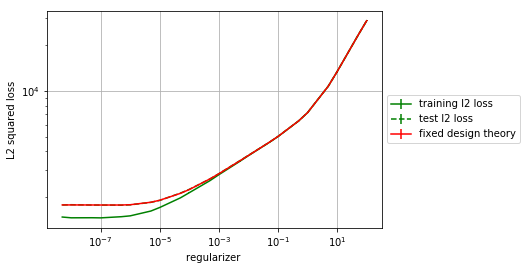

('noise level', '1e4')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


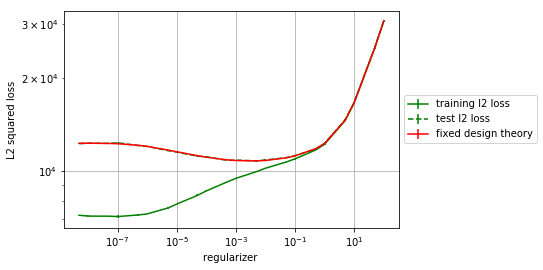

('noise level', '1e5')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


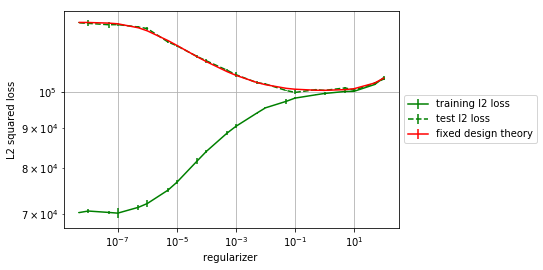

In [43]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input, noise_sigma, n_fp_feat, general_folder, general_folder_eigen, Y_train):
    fp_bits = 32
    plt.figure()
    lamb_list = ["5e-9", "1e-8", "5e-8", "1e-7", "5e-7", "1e-6", "5e-6", "1e-5",
                 "5e-5", "1e-4", "5e-4", "1e-3", "5e-3", "1e-2", "5e-2", "1e-1",
                 "5e-1", "1e0", "5e0", "1e1", "5e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
    theory_l2, theory_l2_std = get_theory_l2_loss(lamb_list, noise_sigma=str(noise_sigma), n_fp_feat=n_fp_feat, 
                          general_folder=general_folder, general_folder_eigen=general_folder_eigen, y_gt=Y_train)
    plt.errorbar(lamb_list_num, theory_l2, yerr=theory_l2_std, fmt="r", label="fixed design theory")
    
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()

for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_8192", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=8192, 
                         general_folder=general_folder, 
                         general_folder_eigen=general_folder_eigen, Y_train=Y_train)

# 1024 rff

##### for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=1024, 
                         general_folder=general_folder, general_folder_eigen=general_folder_eigen, Y_train=Y_train)

('noise level', '1e-2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


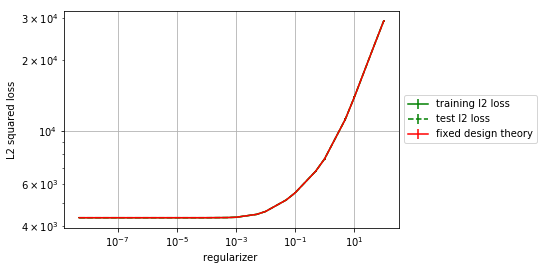

('noise level', '1e-1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


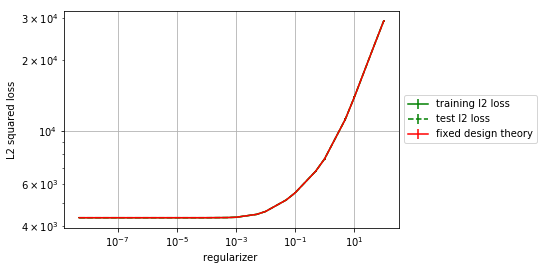

('noise level', '1e0')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


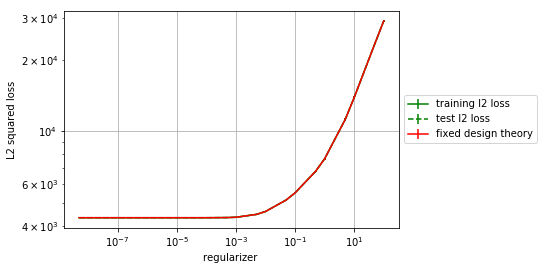

('noise level', '1e1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


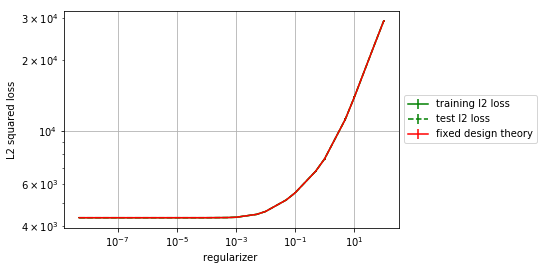

('noise level', '1e2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


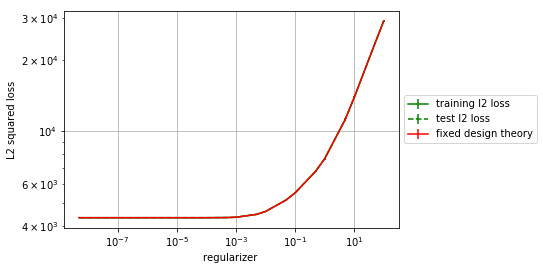

('noise level', '1e3')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


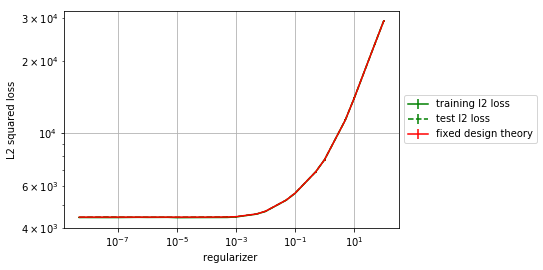

('noise level', '1e4')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


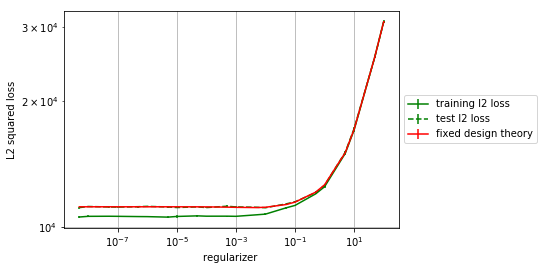

('noise level', '1e5')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


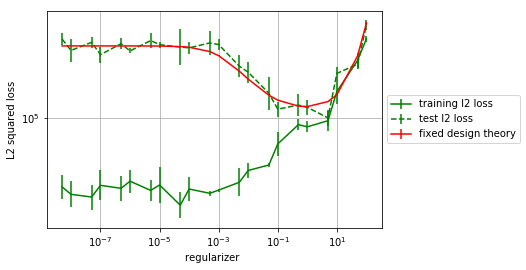

In [45]:
for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=1024, 
                         general_folder=general_folder, general_folder_eigen=general_folder_eigen, Y_train=Y_train)